<a href="https://colab.research.google.com/github/Jinyoung9393/AIFFEL_ONLINE_QUEST/blob/master/Exploration/QUEST01/Quest_FLOWER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt


dataset, dataset_info = tfds.load('tf_flowers', split='train', with_info=True)
num_classes = dataset_info.features['label'].num_classes

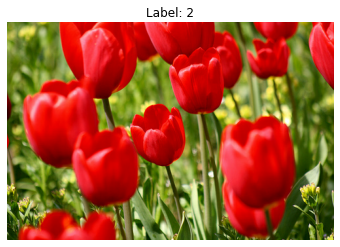

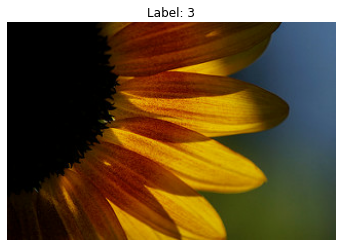

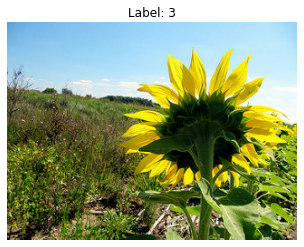

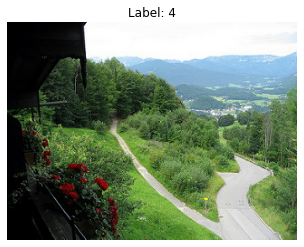

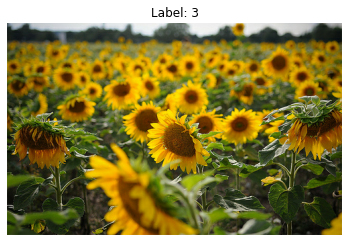

In [ ]:
for data in dataset.take(5):  # 처음 5개의 이미지만 시각화
    image = data['image']  # 이미지 데이터 가져오기
    label = data['label']  # 레이블 가져오기

    # 이미지 시각화
    plt.figure()
    plt.imshow(image)
    plt.title(f'Label: {label}')
    plt.axis('off')  # 축 비활성화
    plt.show()

In [ ]:
def preprocess_data(data):
    image = data['image']
    image = tf.image.resize(image, (224, 224))
    image = tf.keras.applications.resnet50.preprocess_input(image)
    label = tf.one_hot(data['label'], num_classes)
    return image, label
# 데이터 전처리 및 분할
batch_size = 32

# 데이터셋의 총 샘플 수 얻기
total_samples = dataset_info.splits['train'].num_examples

In [ ]:
# 데이터를 훈련 세트, 검증 세트 및 테스트 세트로 분할
train_samples = int(0.7 * total_samples)
validation_samples = int(0.15 * total_samples)
test_samples = total_samples - train_samples - validation_samples

train_dataset = dataset.take(train_samples)
validation_dataset = dataset.skip(train_samples).take(validation_samples)
test_dataset = dataset.skip(train_samples + validation_samples).take(test_samples)

# 배치 처리
train_batches = train_dataset.map(preprocess_data).batch(batch_size)
validation_batches = validation_dataset.map(preprocess_data).batch(batch_size)
test_batches = test_dataset.map(preprocess_data).batch(batch_size)

In [ ]:
# 데이터셋 크기 확인
print("훈련 세트 크기:", train_samples)
print("검증 세트 크기:", validation_samples)
print("테스트 세트 크기:", test_samples)

훈련 세트 크기: 2569
검증 세트 크기: 550
테스트 세트 크기: 551


In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False)

In [ ]:
# 새로운 분류 레이어 추가
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)

# 사전 훈련된 가중치를 고정
for layer in base_model.layers:
    layer.trainable = False


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

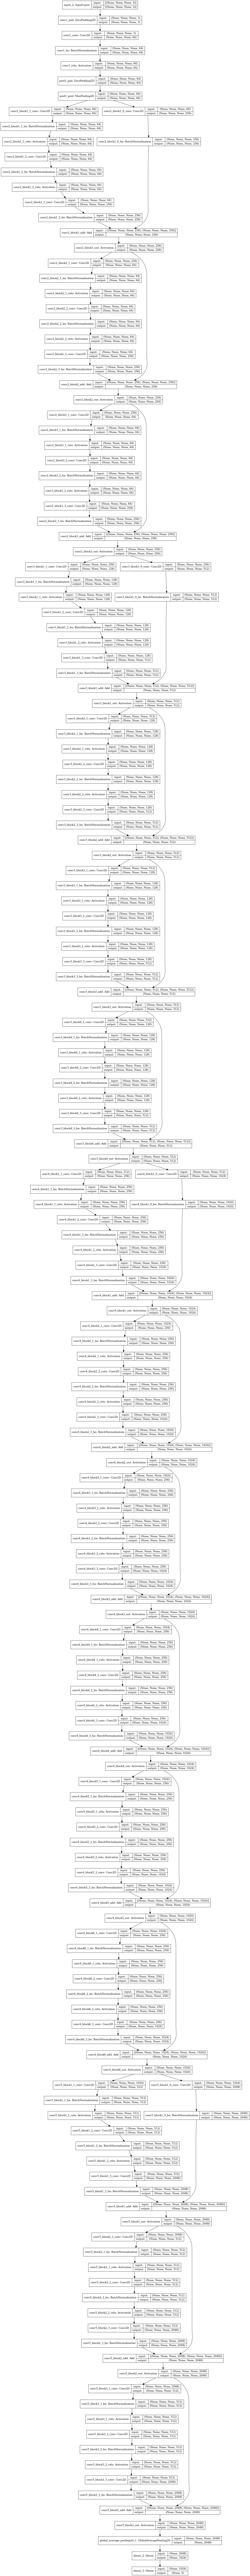

In [ ]:
plot_model(model, to_file='flower_classification_resnet.png', show_shapes=True)  # 모델 시각화 및 저장

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
# 모델 훈련
epochs = 10  # 필요한 에포크 수로 조정

# 훈련 세트와 검증 세트를 사용하여 모델을 훈련합니다
history = model.fit(
    train_batches,
    epochs=epochs,
    validation_data=validation_batches
)

Epoch 1/10
81/81 [==============================] - 18s 151ms/step - loss: 0.5594 - accuracy: 0.8264 - val_loss: 0.3142 - val_accuracy: 0.8927
Epoch 2/10
81/81 [==============================] - 11s 131ms/step - loss: 0.1606 - accuracy: 0.9455 - val_loss: 0.3548 - val_accuracy: 0.8855
Epoch 3/10
81/81 [==============================] - 11s 133ms/step - loss: 0.0746 - accuracy: 0.9759 - val_loss: 0.2620 - val_accuracy: 0.9055
Epoch 4/10
81/81 [==============================] - 11s 130ms/step - loss: 0.0467 - accuracy: 0.9883 - val_loss: 0.3150 - val_accuracy: 0.9000
Epoch 5/10
81/81 [==============================] - 11s 133ms/step - loss: 0.0284 - accuracy: 0.9914 - val_loss: 0.2835 - val_accuracy: 0.9236
Epoch 6/10
81/81 [==============================] - 11s 133ms/step - loss: 0.0310 - accuracy: 0.9899 - val_loss: 0.2814 - val_accuracy: 0.9218
Epoch 7/10
81/81 [==============================] - 11s 134ms/step - loss: 0.0165 - accuracy: 0.9969 - val_loss: 0.2831 - val_accuracy: 0.9218

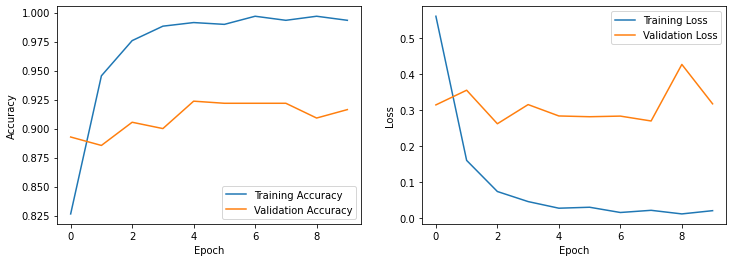

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# 모델 평가
test_loss, test_accuracy = model.evaluate(test_batches)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

18/18 [==============================] - 4s 113ms/step - loss: 0.3501 - accuracy: 0.9220
Test Loss: 0.3500508964061737
Test Accuracy: 0.9219600558280945
